In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


# **부산 내 관광지별 외국인 관광객 소비금액 분석 (2020 - 2021)**

- 최강5조 (조원 : 문지수, 이은서[조장], 한광욱, 황지혜)

### 프로젝트 목차
- 제목 
- 팀원 소개 
- 분석 배경 (기획의도)
1. 데이터 찾기가 쉬웠다
2. 외국인 관광객 천만명 유치 예정 - 현행 분석 중점으로 둠
3. 정책 시행 후 데이터와 이번 프로젝트의 분석 데이터를 비교할 예정 - 추후 과제
- 데이타 수집 
- 전처리 : 결측치 + 오탈자 수정 + 평균 컬럼 추가
- 데이터 분석 : (그룹 별 데이터 추출, 시각화 후 결과값 분석 예정)
- SQL 또는 CSV 저장 : csv 저장 - df.to_csv method, sql upload - load data
- 기사 크롤링
- 데이타 출처 - 부산데이터진흥원
- 추후 과제 (프로젝트 후기)
정책 시행 후 데이터와 이번 프로젝트의 분석 데이터를 비교할 예정 - 추후 과제

## 데이터 전처리
- 결측치 확인
- 오탈자 확인 및 처리

In [5]:
# 관련 모듈 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.font_manager as fm
plt.rc('font', family='NanumBarunGothic') 
from matplotlib.pyplot import figure

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [6]:
# 데이터 불러오기
df = pd.read_csv('/content/drive/MyDrive/project_pfizer/BC_BS_TRRSRT_INFLOW_NLTY_ACCTO_CARD_UTILIIZA_LIST_202106.csv'); df

,PLACE_NM,COUNTRY_NM,CARD_UTILIIZA_PRICE,CARD_UTILIIZA_CAS_CO,BASE_QUARTER
0,BIFF광장&용두산공원&보수동책방골목,일본,226489999,5228,2020년 1분기
1,BIFF광장&용두산공원&보수동책방골목,대만,159608606,2703,2020년 1분기
2,BIFF광장&용두산공원&보수동책방골목,중국,53957560,864,2020년 1분기
3,BIFF광장&용두산공원&보수동책방골목,미국,48896670,1477,2020년 1분기
4,BIFF광장&용두산공원&보수동책방골목,태국,16107500,335,2020년 1분기
...,...,...,...,...,...
3297,흰여울문화마을,콜롬비아,11000,2,2021년 1분기
3298,흰여울문화마을,그리스,10000,1,2021년 1분기
3299,흰여울문화마을,오스트레일리아,10000,1,2021년 1분기
3300,흰여울문화마을,스웨덴,6500,1,2021년 1분기


In [7]:
df.head()

,PLACE_NM,COUNTRY_NM,CARD_UTILIIZA_PRICE,CARD_UTILIIZA_CAS_CO,BASE_QUARTER
0,BIFF광장&용두산공원&보수동책방골목,일본,226489999,5228,2020년 1분기
1,BIFF광장&용두산공원&보수동책방골목,대만,159608606,2703,2020년 1분기
2,BIFF광장&용두산공원&보수동책방골목,중국,53957560,864,2020년 1분기
3,BIFF광장&용두산공원&보수동책방골목,미국,48896670,1477,2020년 1분기
4,BIFF광장&용두산공원&보수동책방골목,태국,16107500,335,2020년 1분기


In [8]:
df.info() # 데이터 정보 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3302 entries, 0 to 3301
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   PLACE_NM              3302 non-null   object
 1   COUNTRY_NM            3302 non-null   object
 2   CARD_UTILIIZA_PRICE   3302 non-null   int64 
 3   CARD_UTILIIZA_CAS_CO  3302 non-null   int64 
 4   BASE_QUARTER          3302 non-null   object
dtypes: int64(2), object(3)
memory usage: 129.1+ KB


In [9]:
df.isnull().sum() # 결측치 확인

PLACE_NM                0
COUNTRY_NM              0
CARD_UTILIIZA_PRICE     0
CARD_UTILIIZA_CAS_CO    0
BASE_QUARTER            0
dtype: int64

In [10]:
df.describe() # 수치형 변수 요약

,CARD_UTILIIZA_PRICE,CARD_UTILIIZA_CAS_CO
count,3.302000e+03,3302.00000
mean,8.804272e+06,77.78407
std,6.415556e+07,508.33583
min,3.000000e+02,1.00000
25%,2.900000e+04,2.00000
50%,1.300000e+05,5.00000
75%,7.755750e+05,17.00000
max,1.410758e+09,12358.00000


In [11]:
df['COUNTRY_NM'].unique() # 나라명 오탈자 확인

array(['일본', '대만', '중국', '미국', '태국', '홍콩', '말레이지아', '러시아', '싱가폴',
       '으스트레일리아', '베트남', '인도네시아', '영국', '프랑스', '독일', '필리핀', '마카오', '노르웨이',
       '브라질', '버뮤다', '캐나다', '벨기에', '네덜란드', '뉴질랜드', '이탈리아', '스페인', '멕시코',
       '칠레', '아랍에미레이트', '아르헨티나', '덴마크', '스웨덴', '브루나이드루살렘', '스위스', '우크라이나',
       '오스트리아', '쿠웨이트', '터키', '사우디아라비아', '핀란드', '라오스', '이스라엘', '아일랜드',
       '슬로바키아', '에콰도르', '체코', '조지아', '콜롬비아', '폴란드', '남아프리카공화국', '포르투칼',
       '카타르', '푸에르토리코', '카자흐스탄', '에스토니아', '헝가리', '루마니아', '크로아티아', '파마나',
       '케냐', '발레루스', '코스타리카', '모로코', '괌', '슬로베니아', '불가리', '온두라스',
       '보스니아헤르체고비치', '인도', '오스트레일리아', '싸이프러스', '미얀ㅇ마', '바하마', '벨라루스',
       '베네수엘라', '몽고', '아이슬랜드', '파라과이', '캄보디아', '미얀마', '그리스', '리투아니아',
       '가나', '탄자니아', '룩셈부르크', 'ㅗㄹ란드', '불가리아', '엘살바도르', '파키스탄', '페루', '체크',
       '벨라르스', '코트디부아르', '이집트', '허가리', '도미니카', '오만', '니카라과', '짐바브웨',
       '레바논', '파나마', '라트비아', '스리랑카', '키르기스스탄', '알제리', '오스트레', '보츠와나',
       '푸에르', '파푸아뉴기니', '트리니나드토바고', '콰테말라', '우즈베키스탄', '투르크메니스탄', '아제르바이잔',


In [12]:
# 나라명 갯수 확인
country_list = df['COUNTRY_NM'].unique()
country_dict = {}
for country in country_list:
    country_dict[f'{country}'] = 0
for coun in df['COUNTRY_NM']:
    country_dict[f'{coun}'] += 1
print(country_dict)

{'일본': 87, '대만': 67, '중국': 86, '미국': 95, '태국': 63, '홍콩': 66, '말레이지아': 46, '러시아': 81, '싱가폴': 70, '으스트레일리아': 1, '베트남': 61, '인도네시아': 76, '영국': 86, '프랑스': 82, '독일': 71, '필리핀': 56, '마카오': 11, '노르웨이': 46, '브라질': 46, '버뮤다': 9, '캐나다': 73, '벨기에': 54, '네덜란드': 51, '뉴질랜드': 38, '이탈리아': 57, '스페인': 60, '멕시코': 60, '칠레': 26, '아랍에미레이트': 43, '아르헨티나': 16, '덴마크': 51, '스웨덴': 52, '브루나이드루살렘': 7, '스위스': 54, '우크라이나': 47, '오스트리아': 40, '쿠웨이트': 14, '터키': 38, '사우디아라비아': 33, '핀란드': 54, '라오스': 10, '이스라엘': 24, '아일랜드': 38, '슬로바키아': 16, '에콰도르': 11, '체코': 41, '조지아': 3, '콜롬비아': 43, '폴란드': 47, '남아프리카공화국': 33, '포르투칼': 16, '카타르': 26, '푸에르토리코': 39, '카자흐스탄': 53, '에스토니아': 31, '헝가리': 28, '루마니아': 26, '크로아티아': 20, '파마나': 1, '케냐': 5, '발레루스': 1, '코스타리카': 18, '모로코': 9, '괌': 10, '슬로베니아': 9, '불가리': 1, '온두라스': 9, '보스니아헤르체고비치': 6, '인도': 48, '오스트레일리아': 75, '싸이프러스': 15, '미얀ㅇ마': 1, '바하마': 47, '벨라루스': 29, '베네수엘라': 37, '몽고': 30, '아이슬랜드': 11, '파라과이': 16, '캄보디아': 19, '미얀마': 16, '그리스': 34, '리투아니아': 28, '가나': 4, '탄자니아': 8, '룩셈부르크': 20, 'ㅗㄹ란드': 1,

In [13]:
# 나라명 오탈자 처리
df['COUNTRY_NM'] = df['COUNTRY_NM'].apply(lambda x : x.replace('으스트레일리아', '오스트레일리아'))
df['COUNTRY_NM'] = df['COUNTRY_NM'].apply(lambda x : x.replace('파마나', '파나마'))
df['COUNTRY_NM'] = df['COUNTRY_NM'].apply(lambda x : x.replace('발레루스', '벨라루스'))
df['COUNTRY_NM'] = df['COUNTRY_NM'].apply(lambda x : x.replace('벨라르스', '벨라루스'))
df['COUNTRY_NM'] = df['COUNTRY_NM'].apply(lambda x : x.replace('체크', '체코'))
df['COUNTRY_NM'] = df['COUNTRY_NM'].apply(lambda x : x.replace('ㅗㄹ란드', '폴란드'))
df['COUNTRY_NM'] = df['COUNTRY_NM'].apply(lambda x : x.replace('허가리', '헝가리'))
df['COUNTRY_NM'] = df['COUNTRY_NM'].apply(lambda x : x.replace( '메시코', '멕시코'))
df['COUNTRY_NM'] = df['COUNTRY_NM'].apply(lambda x : x.replace( '말레이지아', '말레이시아'))
df['COUNTRY_NM'] = df['COUNTRY_NM'].apply(lambda x : x.replace( '응일리아', '오스트레'))
df['COUNTRY_NM'] = df['COUNTRY_NM'].apply(lambda x : x.replace( '카자흐스틴','카자흐스탄'))
df['COUNTRY_NM'] = df['COUNTRY_NM'].apply(lambda x : x.replace( '미안마','미얀마'))
df['COUNTRY_NM'] = df['COUNTRY_NM'].apply(lambda x : x.replace('파마나', '파나마'))
df['COUNTRY_NM'] = df['COUNTRY_NM'].apply(lambda x : x.replace('발레루스', '벨라루스'))
df['COUNTRY_NM'] = df['COUNTRY_NM'].apply(lambda x : x.replace('렐라루스', '벨라루스'))
df['COUNTRY_NM'] = df['COUNTRY_NM'].apply(lambda x : x.replace('벨라르스', '벨라루스'))
df['COUNTRY_NM'] = df['COUNTRY_NM'].apply(lambda x : x.replace('미얀ㅇ마', '미얀마'))
df['COUNTRY_NM'] = df['COUNTRY_NM'].apply(lambda x : x.replace('말레이지아', '말레이시아'))
df['COUNTRY_NM'] = df['COUNTRY_NM'].apply(lambda x : x.replace('포르투칼', '포르투갈'))
df['COUNTRY_NM'] = df['COUNTRY_NM'].apply(lambda x : x.replace('트리니나드바고', '트리니다드바고'))
df['COUNTRY_NM'] = df['COUNTRY_NM'].apply(lambda x : x.replace('아체르바이잔', '아제르바이잔'))
df['COUNTRY_NM'] = df['COUNTRY_NM'].apply(lambda x : x.replace('콰테말라', '과테말라'))
df['COUNTRY_NM'] = df['COUNTRY_NM'].apply(lambda x : x.replace('트리니나드토바고', '트리니다드바고'))
df['COUNTRY_NM'] = df['COUNTRY_NM'].apply(lambda x : x.replace('푸에르', '푸에르토리코'))
df['COUNTRY_NM'] = df['COUNTRY_NM'].apply(lambda x : x.replace('보스니아헤르체고비치', '보스니아헤르체고비나'))
df['COUNTRY_NM'] = df['COUNTRY_NM'].apply(lambda x : x.replace('불가리', '불가리아'))


In [14]:
# 바뀐 결과 확인
country_list = df['COUNTRY_NM'].unique()
country_dict = {}
for country in country_list:
    country_dict[f'{country}'] = 0
for coun in df['COUNTRY_NM']:
    country_dict[f'{coun}'] += 1
print(country_dict)

{'일본': 87, '대만': 67, '중국': 86, '미국': 95, '태국': 63, '홍콩': 66, '말레이시아': 46, '러시아': 81, '싱가폴': 70, '오스트레일리아': 76, '베트남': 61, '인도네시아': 76, '영국': 86, '프랑스': 82, '독일': 71, '필리핀': 56, '마카오': 11, '노르웨이': 46, '브라질': 46, '버뮤다': 9, '캐나다': 73, '벨기에': 54, '네덜란드': 51, '뉴질랜드': 38, '이탈리아': 57, '스페인': 60, '멕시코': 62, '칠레': 26, '아랍에미레이트': 43, '아르헨티나': 16, '덴마크': 51, '스웨덴': 52, '브루나이드루살렘': 7, '스위스': 54, '우크라이나': 47, '오스트리아': 40, '쿠웨이트': 14, '터키': 38, '사우디아라비아': 33, '핀란드': 54, '라오스': 10, '이스라엘': 24, '아일랜드': 38, '슬로바키아': 16, '에콰도르': 11, '체코': 42, '조지아': 3, '콜롬비아': 43, '폴란드': 48, '남아프리카공화국': 33, '포르투갈': 16, '카타르': 26, '푸에르토리코토리코': 39, '카자흐스탄': 54, '에스토니아': 31, '헝가리': 29, '루마니아': 26, '크로아티아': 20, '파나마': 23, '케냐': 5, '벨라루스': 32, '코스타리카': 18, '모로코': 9, '괌': 10, '슬로베니아': 9, '불가리아': 1, '온두라스': 9, '보스니아헤르체고비나': 10, '인도': 48, '싸이프러스': 15, '미얀마': 18, '바하마': 47, '베네수엘라': 37, '몽고': 30, '아이슬랜드': 11, '파라과이': 16, '캄보디아': 19, '그리스': 34, '리투아니아': 28, '가나': 4, '탄자니아': 8, '룩셈부르크': 20, '불가리아아': 9, '엘살바도르': 8, '파키스탄': 7, '페루':

In [15]:
def myreplace(series):
    probidx = []
    myseries = pd.Series([])
    for i, val in enumerate(series):
        if val == '오스트레':
            probidx.append(i)
            myseries[i] = '오스트레일리아'
        else:
            myseries[i] = val
    return myseries
  
df['COUNTRY_NM'] = myreplace(df['COUNTRY_NM'])
df['COUNTRY_NM'].unique()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


array(['일본', '대만', '중국', '미국', '태국', '홍콩', '말레이시아', '러시아', '싱가폴',
       '오스트레일리아', '베트남', '인도네시아', '영국', '프랑스', '독일', '필리핀', '마카오', '노르웨이',
       '브라질', '버뮤다', '캐나다', '벨기에', '네덜란드', '뉴질랜드', '이탈리아', '스페인', '멕시코',
       '칠레', '아랍에미레이트', '아르헨티나', '덴마크', '스웨덴', '브루나이드루살렘', '스위스', '우크라이나',
       '오스트리아', '쿠웨이트', '터키', '사우디아라비아', '핀란드', '라오스', '이스라엘', '아일랜드',
       '슬로바키아', '에콰도르', '체코', '조지아', '콜롬비아', '폴란드', '남아프리카공화국', '포르투갈',
       '카타르', '푸에르토리코토리코', '카자흐스탄', '에스토니아', '헝가리', '루마니아', '크로아티아',
       '파나마', '케냐', '벨라루스', '코스타리카', '모로코', '괌', '슬로베니아', '불가리아', '온두라스',
       '보스니아헤르체고비나', '인도', '싸이프러스', '미얀마', '바하마', '베네수엘라', '몽고', '아이슬랜드',
       '파라과이', '캄보디아', '그리스', '리투아니아', '가나', '탄자니아', '룩셈부르크', '불가리아아',
       '엘살바도르', '파키스탄', '페루', '코트디부아르', '이집트', '도미니카', '오만', '니카라과',
       '짐바브웨', '레바논', '라트비아', '스리랑카', '키르기스스탄', '알제리', '보츠와나', '푸에르토리코',
       '파푸아뉴기니', '트리니다드바고', '과테말라', '우즈베키스탄', '투르크메니스탄', '아제르바이잔',
       '나이지리아', '자메이카', '카메룬', '세르비아', '몰디브', '콩고', '볼리비아', '방글라데시',
  

In [16]:
df['COUNTRY_NM'].unique() # 나라명 오탈자 처리 완료

array(['일본', '대만', '중국', '미국', '태국', '홍콩', '말레이시아', '러시아', '싱가폴',
       '오스트레일리아', '베트남', '인도네시아', '영국', '프랑스', '독일', '필리핀', '마카오', '노르웨이',
       '브라질', '버뮤다', '캐나다', '벨기에', '네덜란드', '뉴질랜드', '이탈리아', '스페인', '멕시코',
       '칠레', '아랍에미레이트', '아르헨티나', '덴마크', '스웨덴', '브루나이드루살렘', '스위스', '우크라이나',
       '오스트리아', '쿠웨이트', '터키', '사우디아라비아', '핀란드', '라오스', '이스라엘', '아일랜드',
       '슬로바키아', '에콰도르', '체코', '조지아', '콜롬비아', '폴란드', '남아프리카공화국', '포르투갈',
       '카타르', '푸에르토리코토리코', '카자흐스탄', '에스토니아', '헝가리', '루마니아', '크로아티아',
       '파나마', '케냐', '벨라루스', '코스타리카', '모로코', '괌', '슬로베니아', '불가리아', '온두라스',
       '보스니아헤르체고비나', '인도', '싸이프러스', '미얀마', '바하마', '베네수엘라', '몽고', '아이슬랜드',
       '파라과이', '캄보디아', '그리스', '리투아니아', '가나', '탄자니아', '룩셈부르크', '불가리아아',
       '엘살바도르', '파키스탄', '페루', '코트디부아르', '이집트', '도미니카', '오만', '니카라과',
       '짐바브웨', '레바논', '라트비아', '스리랑카', '키르기스스탄', '알제리', '보츠와나', '푸에르토리코',
       '파푸아뉴기니', '트리니다드바고', '과테말라', '우즈베키스탄', '투르크메니스탄', '아제르바이잔',
       '나이지리아', '자메이카', '카메룬', '세르비아', '몰디브', '콩고', '볼리비아', '방글라데시',
  

## 그룹별 평균 소비 금액 분석 (관광지별, 나라별, 분기별)

In [17]:
df['AVG_CARD_UTILIIZA_PRICE'] = df['CARD_UTILIIZA_PRICE'] / df['CARD_UTILIIZA_CAS_CO']; df # 평균 소비금액 컬럼 추가

,PLACE_NM,COUNTRY_NM,CARD_UTILIIZA_PRICE,CARD_UTILIIZA_CAS_CO,BASE_QUARTER,AVG_CARD_UTILIIZA_PRICE
0,BIFF광장&용두산공원&보수동책방골목,일본,226489999,5228,2020년 1분기,43322.494070
1,BIFF광장&용두산공원&보수동책방골목,대만,159608606,2703,2020년 1분기,59048.688864
2,BIFF광장&용두산공원&보수동책방골목,중국,53957560,864,2020년 1분기,62450.879630
3,BIFF광장&용두산공원&보수동책방골목,미국,48896670,1477,2020년 1분기,33105.396073
4,BIFF광장&용두산공원&보수동책방골목,태국,16107500,335,2020년 1분기,48082.089552
...,...,...,...,...,...,...
3297,흰여울문화마을,콜롬비아,11000,2,2021년 1분기,5500.000000
3298,흰여울문화마을,그리스,10000,1,2021년 1분기,10000.000000
3299,흰여울문화마을,오스트레일리아,10000,1,2021년 1분기,10000.000000
3300,흰여울문화마을,스웨덴,6500,1,2021년 1분기,6500.000000


In [18]:
df2 = df.groupby(['PLACE_NM','COUNTRY_NM'])['CARD_UTILIIZA_PRICE'].agg(**{'mean_CARD_UTILIIZA_PRICE':'mean'}).reset_index(); df2 # 관광지별 소비금액

,PLACE_NM,COUNTRY_NM,mean_CARD_UTILIIZA_PRICE
0,BIFF광장&용두산공원&보수동책방골목,가나,8000.0
1,BIFF광장&용두산공원&보수동책방골목,괌,11100.0
2,BIFF광장&용두산공원&보수동책방골목,그리스,81350.0
3,BIFF광장&용두산공원&보수동책방골목,남아프리카공화국,46200.0
4,BIFF광장&용두산공원&보수동책방골목,네덜란드,233725.0
...,...,...,...
1067,흰여울문화마을,파나마,6000.0
1068,흰여울문화마을,프랑스,32880.0
1069,흰여울문화마을,핀란드,9950.0
1070,흰여울문화마을,필리핀,16820.0


In [19]:
df3 = df.groupby(['COUNTRY_NM','PLACE_NM'])['CARD_UTILIIZA_PRICE'].agg(**{'mean_CARD_UTILIIZA_PRICE':'mean'}).reset_index(); df3 # 나라별 소비금액

,COUNTRY_NM,PLACE_NM,mean_CARD_UTILIIZA_PRICE
0,가나,BIFF광장&용두산공원&보수동책방골목,8000.0
1,가나,부산 서면,436950.0
2,가나,센텀시티(신세계센텀 등),98000.0
3,과테말라,부산 서면,289200.0
4,과테말라,해운대 해수욕장,30000.0
...,...,...,...
1067,홍콩,자갈치·국제시장·부평깡통야시장,579280.0
1068,홍콩,전포카페거리,196470.0
1069,홍콩,태종대,10500.0
1070,홍콩,해운대 해수욕장,67582916.6


In [20]:
df4 = df.groupby(['BASE_QUARTER','PLACE_NM'])['CARD_UTILIIZA_PRICE'].agg(**{'mean_CARD_UTILIIZA_PRICE':'mean'}).reset_index(); df4 # 분기별 소비금액(관광지별)

,BASE_QUARTER,PLACE_NM,mean_CARD_UTILIIZA_PRICE
0,2020년 1분기,BIFF광장&용두산공원&보수동책방골목,8.798511e+06
1,2020년 1분기,감천문화마을,1.455301e+06
2,2020년 1분기,광안리해수욕장,3.196265e+06
3,2020년 1분기,"다대포해수욕장(굼의 낙조분수, 몰운대)",7.838812e+04
4,2020년 1분기,동백섬&누리마루APEC하우스,7.821044e+06
...,...,...,...
90,2021년 1분기,자갈치·국제시장·부평깡통야시장,9.694154e+05
91,2021년 1분기,전포카페거리,2.803553e+05
92,2021년 1분기,태종대,7.869000e+04
93,2021년 1분기,해운대 해수욕장,2.150271e+07


In [21]:
df5 = df.groupby(['BASE_QUARTER','COUNTRY_NM'])['CARD_UTILIIZA_PRICE'].agg(**{'mean_CARD_UTILIIZA_PRICE':'mean'}).reset_index(); df5 # 분기별 소비금액(나라별)

,BASE_QUARTER,COUNTRY_NM,mean_CARD_UTILIIZA_PRICE
0,2020년 1분기,괌,8.310000e+04
1,2020년 1분기,그리스,1.657333e+05
2,2020년 1분기,남아프리카공화국,1.561714e+05
3,2020년 1분기,네덜란드,1.588448e+06
4,2020년 1분기,노르웨이,1.103269e+07
...,...,...,...
467,2021년 1분기,프랑스,1.406965e+06
468,2021년 1분기,핀란드,1.932232e+05
469,2021년 1분기,필리핀,3.985020e+05
470,2021년 1분기,헝가리,1.320000e+04


In [22]:
df2.sort_values(by='mean_CARD_UTILIIZA_PRICE',ascending=False)

,PLACE_NM,COUNTRY_NM,mean_CARD_UTILIIZA_PRICE
520,센텀시티(신세계센텀 등),미국,793615623.0
971,해운대 해수욕장,미국,778305948.6
990,해운대 해수욕장,싱가폴,666858633.4
412,부산 서면,미국,573083492.0
457,부산 서면,중국,354694089.0
...,...,...,...
285,"다대포해수욕장(굼의 낙조분수, 몰운대)",핀란드,1000.0
713,오륙도&이기대 갈맷길,엘살바도르,1000.0
203,광안리해수욕장,알제리,950.0
47,BIFF광장&용두산공원&보수동책방골목,엘살바도르,700.0


In [23]:
df3.sort_values(by='mean_CARD_UTILIIZA_PRICE',ascending=False)

,COUNTRY_NM,PLACE_NM,mean_CARD_UTILIIZA_PRICE
257,미국,센텀시티(신세계센텀 등),793615623.0
266,미국,해운대 해수욕장,778305948.6
485,싱가폴,해운대 해수욕장,666858633.4
255,미국,부산 서면,573083492.0
748,중국,부산 서면,354694089.0
...,...,...,...
570,엘살바도르,오륙도&이기대 갈맷길,1000.0
1016,핀란드,"다대포해수욕장(굼의 낙조분수, 몰운대)",1000.0
542,알제리,광안리해수욕장,950.0
565,엘살바도르,BIFF광장&용두산공원&보수동책방골목,700.0


## 소비 금액 분석 결과 (시각화)

In [24]:
# 그룹핑 함수 정의
def grouping(col):
    global df
    dff = df.copy()
    dff = dff.groupby(col).sum()
    dff.reset_index(inplace=True)
    fd = dff.sort_values(by='CARD_UTILIIZA_PRICE', ascending=False)
    fd = fd[:10]
    fd.sort_values(by='CARD_UTILIIZA_PRICE', ascending=True, inplace=True)
    fd.reset_index(inplace=True, drop=True)
    return fd


# text 삽입 함수 정의
def plottext(col):
    lastidx = list(fd.index)[-1]
    plt.xlim(0, fd.loc[lastidx]['CARD_UTILIIZA_PRICE'] * 1.4)
    for i, place in enumerate(fd[col][:10]):
        plt.text(fd['CARD_UTILIIZA_PRICE'][i] - 1, fd[col][i],
                 f'{int(fd["CARD_UTILIIZA_PRICE"][i]):,}원')

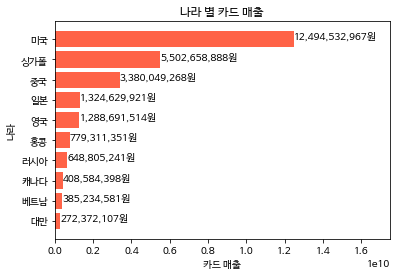

<Figure size 960x640 with 0 Axes>

<Figure size 960x640 with 0 Axes>

In [30]:
# 나라 별
fd = grouping('COUNTRY_NM')
plt.barh(fd['COUNTRY_NM'][:10], fd['CARD_UTILIIZA_PRICE'][:10], color='tomato')
plt.title('나라 별 카드 매출')
plt.xlabel('카드 매출')
plt.ylabel('나라')
plottext('COUNTRY_NM')
plt.show()
figure(figsize=(12, 8), dpi=80)

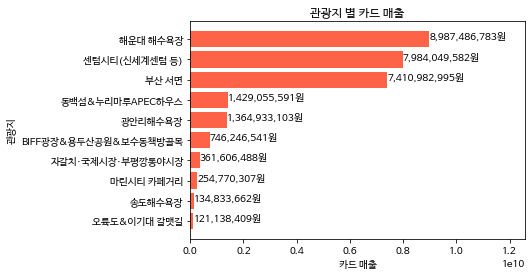

<Figure size 960x640 with 0 Axes>

<Figure size 960x640 with 0 Axes>

In [31]:
# 관광지 별
fd = grouping('PLACE_NM')
plt.barh(fd['PLACE_NM'][:10], fd['CARD_UTILIIZA_PRICE'][:10], color='tomato')
plt.title('관광지 별 카드 매출')
plt.xlabel('카드 매출')
plt.ylabel('관광지')
plottext('PLACE_NM')
plt.show()
figure(figsize=(12, 8), dpi=80)

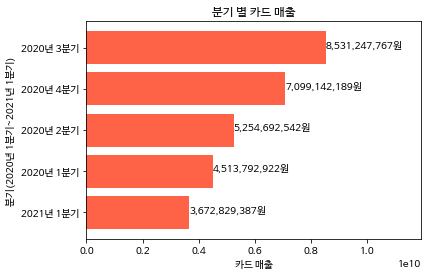

In [27]:
# 분기 별
fd = grouping('BASE_QUARTER')
plt.barh(fd['BASE_QUARTER'][:10], fd['CARD_UTILIIZA_PRICE'][:10], color='tomato')
plt.title('분기 별 카드 매출')
plt.xlabel('카드 매출')
plt.ylabel('분기(2020년 1분기~2021년 1분기)')
plottext('BASE_QUARTER')
plt.show()
figure(figsize=(12, 8), dpi=80)

## DataFrame -> MySQL table 변환